# People Analytics - Is the employee has best performance or not?
Machine learning allows HR department to make decision to predict employee performance in the next 1 year using historical KPI (Key Performance Indicator) data owned by the company. This competition's held by BRI Hackathon (2020) for people analytic category.

Source : [https://www.kaggle.com/c/bri-data-hachathon-people-analytic].

## Content
* Questions and problem understanding
* Pre-processing data
* Handling data
* Modeling
* Conclusion

### Question and problem understanding
Using the existing data to predict wether an employee will be classified as best performance or not.

### Pre-processing data
**Importing needed packages and dataset**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew

train = pd.read_csv('train_PA.csv')
test = pd.read_csv('test_PA.csv')

print(train.shape)
display(train)
print(test.shape)
display(test)

(22005, 30)


,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


(6000, 29)


,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.50,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.00,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.50,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.50,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG03,2.75,PG01,2.75,2.75,RM_type_B,Permanent,Male,1987,N,...,1,0,1,0,49.396667,50.71,0.0,achiev_50%-100%,achiev_< 50%,not reached
5996,JG04,1.17,PG03,1.17,0.50,RM_type_B,Permanent,Male,1987,Y,...,3,0,0,0,76.590000,77.70,0.0,achiev_50%-100%,achiev_< 50%,reached
5997,JG04,1.83,PG03,1.83,1.92,RM_type_A,Permanent,Male,1986,Y,...,3,0,3,0,97.906667,111.49,3.0,achiev_100%-150%,achiev_100%-150%,reached
5998,JG04,1.92,PG03,1.92,1.25,RM_type_A,Permanent,Male,1984,Y,...,3,0,1,0,82.833333,81.64,0.0,achiev_100%-150%,achiev_50%-100%,not reached


### Handling data
**Checking target class**

In [2]:
train['Best Performance'].value_counts()

0    19337
1     2668
Name: Best Performance, dtype: int64

**Drop the target, and combine dataset for easier processing**

In [3]:
combine = pd.concat([train.drop('Best Performance', axis=1), test])

In [4]:
# Abnormal number_of_dependences values
combine.loc[7780, 'number_of_dependences'] = 0
combine.loc[16871, 'number_of_dependences'] = 0

**Ambiguous features**

In [5]:
# achievement_target_1, 2,3
def replace(x):
    if x == 'achiev_< 50%':
        return 'Pencapaian < 50%'
    elif x == 'achiev_50%-100%':
        return 'Pencapaian 50%-100%'
    elif x == 'achiev_100%-150%':
        return 'Pencapaian 100%-150%'
    elif x == 'achiev_> 1.5':
        return 'Pencapaian > 1.5'
    else:
        return x

combine.achievement_target_1 = combine.achievement_target_1.apply(replace)
combine.achievement_target_2 = combine.achievement_target_2.apply(replace)
combine.achievement_target_3 = combine.achievement_target_3.apply(lambda x: 'not_reached' if x == 'not reached' else x) 

**Checking missing values**

In [6]:
print(combine.shape)
na_index = combine.isna().any()[combine.isna().any() == True].index
combine[na_index].isna().sum()

(28005, 29)


Employee_type                              12
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
Avg_achievement_%                        6289
Last_achievement_%                       6302
Achievement_above_100%_during3quartal    6302
achievement_target_1                     6727
achievement_target_2                     6727
achievement_target_3                     6727
dtype: int64

In [7]:
combine2 = combine.dropna(subset=['achievement_target_1'])

In [8]:
print(combine2.shape)
combine2[na_index].isna().sum()

(21278, 29)


Employee_type                               0
Education_level                          3550
GPA                                      3479
year_graduated                           3479
job_duration_as_permanent_worker            0
Avg_achievement_%                           0
Last_achievement_%                          1
Achievement_above_100%_during3quartal       1
achievement_target_1                        0
achievement_target_2                        0
achievement_target_3                        0
dtype: int64

**Drop education features**

In [9]:
drop_col = ['Education_level', 'GPA', 'year_graduated']
combine2.drop(drop_col, axis=1, inplace=True, errors='ignore')

c:\users\adi\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


We filled the NaN values with the **mean**.

In [10]:
combine2 = combine2.fillna(combine2.mean())

### Modeling

In [11]:
non_num_feats = combine2.dtypes[combine2.dtypes == "object"].index
numeric_feats = combine2.dtypes[combine2.dtypes != "object"].index

**Compute skewness**

In [12]:
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
combine2[skewed_feats] = np.log1p(combine2[skewed_feats])

**Drop features**

In [13]:
drop_col = ['Employee_status', 'job_level', 'person_level', 'marital_status_maried(Y/N)',
            'gender', 'Employee_type', 'Achievement_above_100%_during3quartal', 'achievement_target_3',
            'achievement_target_1', 'achievement_target_2', 'number_of_dependences',
            'number_of_dependences (male)', 'number_of_dependences (female)']
combine2.drop(drop_col, axis=1, inplace=True, errors='ignore')
combine2.drop(drop_col, axis=1, inplace=True, errors='ignore')

In [35]:
#combine2 = pd.get_dummies(combine2, drop_first=True)
#combine2 = combine2.fillna(combine2.mean())

**Setting train and test set**

In [14]:
X_test = combine2[combine2.shape[0]-test.shape[0]:]
X_train = combine2[:combine2.shape[0]-test.shape[0]]
y = train.dropna(subset=['achievement_target_1'])['Best Performance']

**Resampling the data**

In [15]:
from sklearn.utils import resample

X = pd.concat([X_train, y], axis=1)
best = X[X['Best Performance'] == 1]
no_best = X[X['Best Performance'] == 0]

np.random.seed(12)
best_resample = resample(best, replace=True, n_samples=len(no_best), random_state=42)

resampled = pd.concat([no_best, best_resample])
resampled

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Best Performance
0,2.197225,2.197225,0.405465,1964,3.433987,3.433987,2.302585,2.079442,0.000000,2.197225,0.000000,68.850000,72.53,0
1,1.819699,1.098612,0.810930,1979,2.772589,2.833213,2.079442,2.079442,2.302585,1.386294,0.000000,94.810000,101.13,0
2,1.040277,1.040277,0.916291,1980,2.772589,2.772589,2.302585,2.302585,0.000000,1.945910,0.000000,72.820000,71.30,0
3,2.188296,1.609438,0.157004,1984,2.197225,2.197225,1.791759,1.791759,0.000000,1.386294,0.000000,86.890000,90.09,0
7,1.011601,1.011601,1.934416,1984,1.945910,1.945910,0.693147,1.609438,1.609438,2.397895,0.000000,86.000000,81.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0.810930,0.810930,0.916291,1980,1.945910,1.945910,1.609438,1.609438,0.000000,1.098612,2.397895,66.120000,62.26,1
12152,1.153732,1.153732,0.405465,1984,1.791759,1.791759,1.609438,1.609438,1.098612,0.693147,0.000000,81.723333,85.80,1
16206,1.071584,1.071584,0.405465,1990,1.386294,1.386294,1.098612,1.386294,0.000000,1.386294,1.609438,32.150000,44.24,1
11821,1.071584,1.071584,0.405465,1987,1.791759,1.791759,1.386294,1.609438,0.000000,1.945910,2.564949,72.490000,77.66,1


**Get dummies!**

In [16]:
X_train = pd.get_dummies(resampled.drop('Best Performance', axis=1), drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
y = resampled['Best Performance']

In [17]:
# Train test split
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(X_train, y, test_size=0.2, random_state=42, stratify=y)

**Lets make models**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
rf = RandomForestClassifier(n_estimators=200, max_depth=9, criterion='entropy', max_features='sqrt', random_state=42)
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=9, random_state=42, subsample=0.9, max_features=0.7)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Random Forest', rf),
               ('Gradien Boosting', gbc)]

**ROC**

We used AUC (Area Under ROC Curve) as evaluation metric.

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

pipe = make_pipeline(Normalizer(), rf)
pipe.fit(A_train, B_train)
B_pred = pipe.predict_proba(A_test)[:,1]
print(pipe.score(A_test, B_test))
print(pipe.score(A_train, B_train))
print(roc_auc_score(B_test, B_pred))

0.7089021342049606
0.7417199442388117
0.7918620057374383


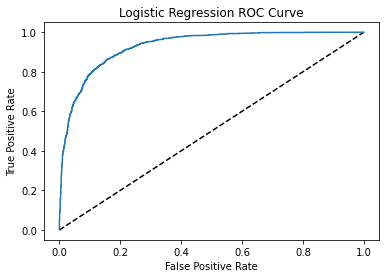

In [35]:
fpr, tpr, thresholds = roc_curve(B_test, B_pred) 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Logistic Regression ROC Curve')
plt.show() 

In [36]:
# Cross validation
from sklearn.model_selection import cross_val_score
cv = cross_val_score(pipe, A_train, B_train, cv=10, scoring='roc_auc')
cv.mean()

0.9214881932572941

In [37]:
print('CV error : ', 1-cv.mean())
print('training error : ', 1-roc_auc_score(B_train, pipe.predict_proba(A_train)[:,1]))
print('test error : ', 1-roc_auc_score(B_test, pipe.predict_proba(A_test)[:,1]))

CV error :  0.07851180674270586
training error :  0.022753365842076434
test error :  0.06912008694880678


In [38]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(B_test, pipe.predict(A_test)))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2601
           1       0.82      0.90      0.85      2600

    accuracy                           0.85      5201
   macro avg       0.85      0.85      0.85      5201
weighted avg       0.85      0.85      0.85      5201



In [39]:
pipe.fit(X_train, y)
y_pred = pipe.predict_proba(X_test)[:,1]

In [41]:
y_pred.shape

(6000,)

**Here's the submission**

In [42]:
solution = pd.DataFrame({'index':test.index, 'Best Performance':y_pred})
solution.to_csv('submission_1.csv', index = False)